# Problem Statement :

        Economic status of any country is highly dependent on income of its residents. It is always very important to study intricately the income statistics of the citizens, analyze it and take required actions to improve its current status. Census data helps to a great extent in providing required information to carry forward this study. 

        The given dataset is also a census data that contains information about Income Evaluation for different countries. Based on available features, build a model to predict whether a person's income exceeds a certain threshold or not. In this case there are two income categories, <=50K and >50K. The model will help to identify the factors that contribute to higher incomes.

# Import Basic Libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',600)
pd.set_option('display.max_columns',100)

# Loading Dataset :

In [3]:
path = r'D:\LearnBay_Placement_Project\Data_inc.csv'
income_data = pd.read_csv(path)

data = income_data.copy()
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [4]:
data.shape

(32561, 16)

# Exploratory Data Analysis :

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

- The given dataset contains 16 columns and 32561 rows.
- The dataset contains both numerical and categorical columns.
- Column **Unnamed** has only 2 not-null values and rest are missing values.
- Other columns do not have any missing values.
- Also Some of the column names have unwanted space before them. So we will rename the columns properly 

In [6]:
data.rename(mapper={' Education':'Education',' Education-num':'Education_num',' marital-status':'Marital_status',
                    ' occupation':'Occupation',' relationship':'Relationship',' race':'Race',' capital-gain':'Capital_gain',
                    ' capital-loss':'Capital_loss',' hours-per-week':'Hours_per_week',' country':'Country',
                    ' income':'Income'},axis=1,inplace=True)

data.head()

,Age,Profession Class,Final_census,Education,Education_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


## Statistical Summary :

### Numerical Columns :

In [7]:
data.describe()

,Age,Final_census,Education_num,Capital_gain,Capital_loss,Hours_per_week,Unnamed: 15
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,2.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,55000.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,55000.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,55000.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,55000.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,55000.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,55000.0


- The Satistics of Numerical Columns of the given dataset says :
    - 1. Age column ranges from 17 to 90.
    - 2. Capital Gain has a range from 0 to 99999 and Capital Loss has a range from 0 to 4356.
    - 3. All the non zero values of Capital Gain and Capital Loss Column are considered as ouliers because values till 75 percentile for both the columns are 0.
    - 4. Here Education_num column is an ordinal categorical variable.So outlier is not considered in this case.
    - 5. All other numerical columns except Education_num has outliers.

### Categorical Columns :

In [8]:
data.describe(include='O')

,Profession Class,Education,Marital_status,Occupation,Relationship,Race,Gender,Country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


- **Observation :**   
    - There are 9 categorical columns in this dataset.
    - Only **Gender** and **Income** column has binary classes. All other columns have multiple classes.
    - **Profession Class** column has 9 Unique Values with 'Private' as mode.
    - Similarly Education Class has 16 unique values, Matrital Status has 7, Occupation has 15 and so on.
    - Most of the observations of this sample are Male and are from United States.

## Target Column :

In [9]:
data['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [10]:
data['Income'].value_counts(normalize=True)*100

 <=50K    75.919044
 >50K     24.080956
Name: Income, dtype: float64

- **Observation :**
    - In this dataset **'Income'** is our target variable.
    - The target variable **Income** has two classes, >50K and <=50K. So, it is a binary classification problem.
    - From the above output we can say the given dataset is imbalanced.

## Handling Missing Values :

In [11]:
data.isnull().sum()/len(data)*100

Age                  0.000000
Profession Class     0.000000
Final_census         0.000000
Education            0.000000
Education_num        0.000000
Marital_status       0.000000
Occupation           0.000000
Relationship         0.000000
Race                 0.000000
Gender               0.000000
Capital_gain         0.000000
Capital_loss         0.000000
Hours_per_week       0.000000
Country              0.000000
Income               0.000000
Unnamed: 15         99.993858
dtype: float64

- **Unnamed: 15** column has 99.99% missing values. So we will drop this column.
- Other columns do not have any missing values as we have observed earlier as well.

In [12]:
data = data.drop('Unnamed: 15',axis=1)
data.head()

,Age,Profession Class,Final_census,Education,Education_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Checking For Dirty Data :

### Categorical Columns :

In [13]:
column = data.select_dtypes('O').columns
for col in column:
    print('*'*60)
    print(col)
    print('*'*60)
    print(data[col].value_counts())

************************************************************
Profession Class
************************************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64
************************************************************
Education
************************************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
***************************************************

- **Observation :**
    - From the above output we can observe that there are some dirty data mentioned as ' ?' in **Profession Class** , **Occupation** and **Country** column and it is needed to be treated.
    - We will mask this dirty data as missing values

In [14]:
data['Profession Class'].mask((data['Profession Class'].eq(' ?')),inplace=True)
data['Occupation'].mask((data['Occupation'].eq(' ?')),inplace=True)
data['Country'].mask((data['Country'].eq(' ?')),inplace=True)

In [15]:
data.isnull().sum()

Age                    0
Profession Class    1836
Final_census           0
Education              0
Education_num          0
Marital_status         0
Occupation          1843
Relationship           0
Race                   0
Gender                 0
Capital_gain           0
Capital_loss           0
Hours_per_week         0
Country              583
Income                 0
dtype: int64

In [16]:
data[(data['Profession Class'].isnull()) & (data['Occupation'].isnull())].shape

(1836, 15)

In [17]:
data[(data['Profession Class'].isnull()) & (data['Occupation'].isnull()) & (data['Country'].isnull())].shape

(27, 15)

In [18]:
data[(data['Occupation'].isnull()) & (data['Country'].isnull())].shape

(27, 15)

In [19]:
cols = ['Profession Class','Occupation','Country']
for col in cols:
    print('*'*60)
    print(col)
    print('*'*60)
    print(data[col].value_counts(normalize=True)*100)

************************************************************
Profession Class
************************************************************
 Private             73.868186
 Self-emp-not-inc     8.270138
 Local-gov            6.812042
 State-gov            4.224573
 Self-emp-inc         3.632221
 Federal-gov          3.124491
 Without-pay          0.045566
 Never-worked         0.022783
Name: Profession Class, dtype: float64
************************************************************
Occupation
************************************************************
 Prof-specialty       13.477440
 Craft-repair         13.343968
 Exec-managerial      13.236539
 Adm-clerical         12.272934
 Sales                11.882284
 Other-service        10.726610
 Machine-op-inspct     6.517351
 Transport-moving      5.198906
 Handlers-cleaners     4.459926
 Farming-fishing       3.235888
 Tech-support          3.021030
 Protective-serv       2.112768
 Priv-house-serv       0.485058
 Armed-Forces          0.

- Mode of **Profession Class** and **Country** Column are dominant. So if we fill the missing values using mode approach, that may create biasness in the dataset.
- Also in the above output we observe that 1836 missing values out of 1843 of **Occupation** column, all the 1836 missing values of **Profession Class** column and 27 missing values out of 583 of Country column are in same rows.
- Here we will impute the missing values with 'Unknown'.

In [20]:
data['Profession Class'].fillna('Unknown',inplace=True)
data['Country'].fillna('Unknown',inplace=True)
data['Occupation'].fillna('Unknown',inplace=True)

cols = ['Profession Class','Occupation','Country']
for col in cols:
    print('*'*60)
    print(col)
    print('*'*60)
    print(data[col].value_counts())

************************************************************
Profession Class
************************************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
Unknown               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64
************************************************************
Occupation
************************************************************
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Unknown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64
************

In [21]:
data['Income'].value_counts(normalize=True)*100

 <=50K    75.919044
 >50K     24.080956
Name: Income, dtype: float64

- The ratio of the two classes of target variable is maintained after dropping the rows with missing values. 

### Numerical Columns :

In [22]:
column = data.select_dtypes(include='number').columns
for col in column:
    print('*'*60)
    print(col)
    print('*'*60)
    print(data[col].unique())

************************************************************
Age
************************************************************
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
************************************************************
Final_census
************************************************************
[ 77516  83311 215646 ...  34066  84661 257302]
************************************************************
Education_num
************************************************************
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
************************************************************
Capital_gain
************************************************************
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111


- The above output clearly says that in the numeric columns there is no dirty data.

In [23]:
data.isnull().sum().sum()

0

- There is no missing value in the dataset

## Outlier Treatment :

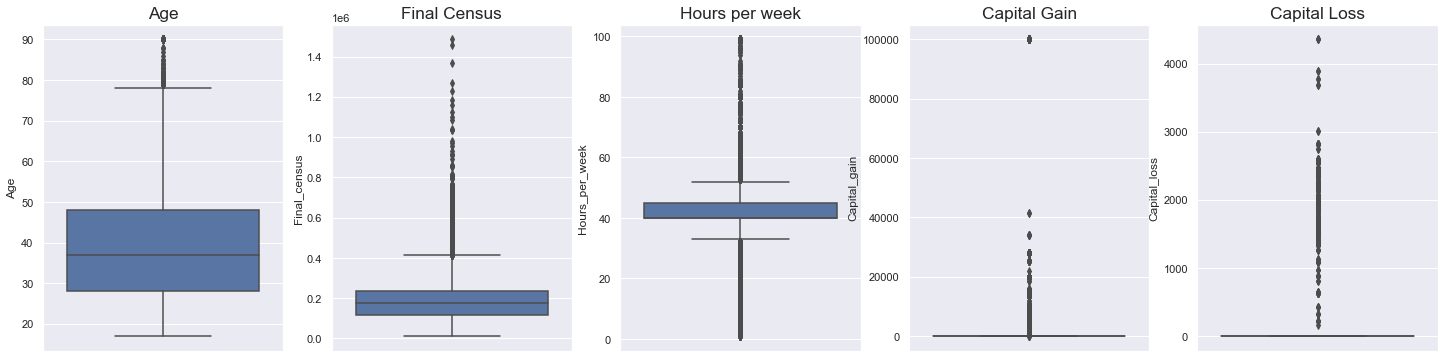

In [24]:
plt.subplots(1,5,figsize=(25,6))
plt.subplot(1,5,1)
sns.boxplot(y='Age',data=data)
plt.title('Age',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
sns.boxplot(y='Final_census',data=data)
plt.title('Final Census',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
sns.boxplot(y='Hours_per_week',data=data)
plt.title('Hours per week',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
sns.boxplot(y='Capital_gain',data=data)
plt.title('Capital Gain',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
sns.boxplot(y='Capital_loss',data=data)
plt.title('Capital Loss',fontdict={'fontsize':'x-large'})

plt.show()

In [25]:
(data['Capital_gain'].value_counts(normalize=True)*100).head()

0        91.671017
15024     1.065692
7688      0.872209
7298      0.755505
99999     0.488314
Name: Capital_gain, dtype: float64

In [26]:
(data['Capital_loss'].value_counts(normalize=True)*100).head()

0       95.334910
1902     0.620374
1977     0.515955
1887     0.488314
1848     0.156629
Name: Capital_loss, dtype: float64

- **Observation 1 :**
    - In **Age** column there are outliers.
    - But we will not handle them as we want to evaluate income of Senior Citizens as well.
- **Observation 2 :**
    - 91.6% values of **Capital Gain** and 95% values of **Capital Loss** is 0. As a result all the remaining values are considered as Outliers.
- **Observation 3 :**
    - We will not treat the extreme values of **Final Census** column as outliers because no. of people belonging to a particular category can be very high.
- **Observation 4 :**
    - Both from the graph and the table we observe that there are some extreme values in **Hours Per Week** column which are considered as outliers. Maximum value  in this column is 99 hrs. which means a person works 14 hrs. everyday on avg. This scenario can be true for some of the individuals. So we will not impute the outliers.

## Graphical Representation :

In [27]:
df = data.copy()
df['Income'] = df['Income'].map({' >50K':1,' <=50K':0})

### Profession Class Column :

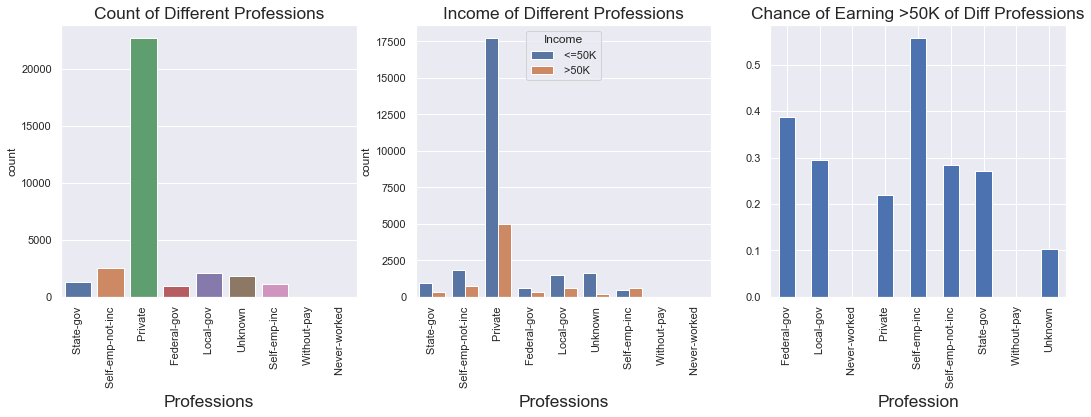

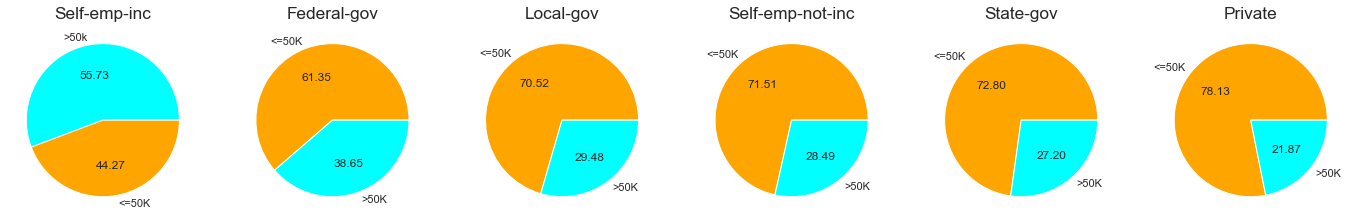

In [28]:
plt.subplots(1,3,figsize=(18,5))

plt.subplot(1,3,1)
sns.countplot(x='Profession Class',data=data)
plt.title('Count of Different Professions',fontdict={'fontsize':'x-large'})
plt.xlabel('Professions',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.countplot(x='Profession Class',data=data,hue='Income')
plt.title('Income of Different Professions',fontdict={'fontsize':'x-large'})
plt.xlabel('Professions',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,3,3)
(df.groupby('Profession Class')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Chance of Earning >50K of Diff Professions',fontdict={'fontsize':'x-large'})
plt.xlabel('Profession',fontdict={'fontsize':'x-large'})

###########################################################################################################################

plt.subplots(1,6,figsize=(24,4))
plt.subplot(1,6,1)
plt.pie(df[df['Profession Class']==' Self-emp-inc']['Income'].value_counts(),
        labels=['>50k','<=50K'],
        autopct='%0.2f',colors=['cyan','orange'])
plt.title('Self-emp-inc',fontdict={'fontsize':'x-large'})

plt.subplot(1,6,2)
plt.pie(df[df['Profession Class']==' Federal-gov']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Federal-gov',fontdict={'fontsize':'x-large'})

plt.subplot(1,6,3)
plt.pie(df[df['Profession Class']==' Local-gov']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Local-gov',fontdict={'fontsize':'x-large'})

plt.subplot(1,6,4)
plt.pie(df[df['Profession Class']==' Self-emp-not-inc']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Self-emp-not-inc',fontdict={'fontsize':'x-large'})

plt.subplot(1,6,5)
plt.pie(df[df['Profession Class']==' State-gov']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('State-gov',fontdict={'fontsize':'x-large'})

plt.subplot(1,6,6)
plt.pie(df[df['Profession Class']==' Private']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Private',fontdict={'fontsize':'x-large'})
plt.show()

- **Observation :**
    - People working in Private sectors are in majority.
    - Ratio of people earning >50K is higher in case of 'Self-emp-inc' followed by 'Federal-gov','Local-gov'.
    - Although people from 'Private' are more in number, but chance of earning >50K is less for them.

### Education Column :

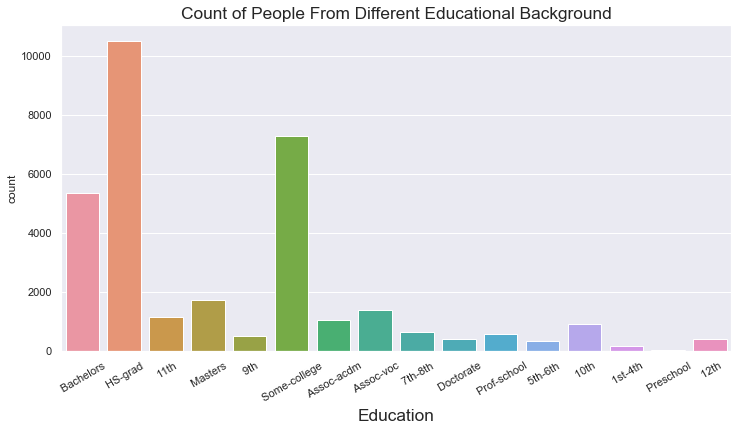

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='Education',data=data)
plt.title('Count of People From Different Educational Background',fontdict={'fontsize':'x-large'})
plt.xlabel('Education',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=30)
plt.show()

- **Observation :**
    - Most of the people have education level of 'HS-Grad' followed by 'Some College' and 'Bachelors'

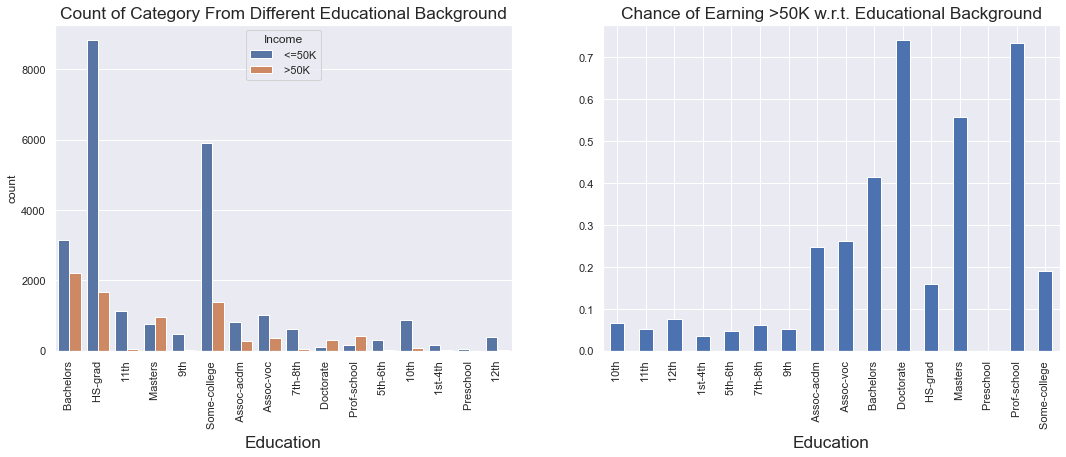

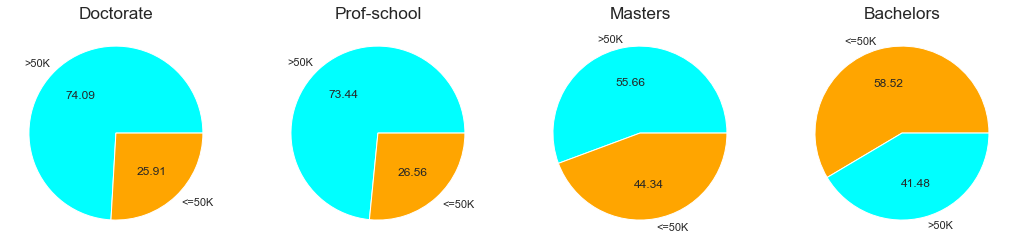

In [30]:
plt.subplots(1,2,figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x='Education',data=data,hue = 'Income')
plt.title('Count of Category From Different Educational Background',fontdict={'fontsize':'x-large'})
plt.xlabel('Education',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
(df.groupby('Education')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Chance of Earning >50K w.r.t. Educational Background',fontdict={'fontsize':'x-large'})
plt.xlabel('Education',fontdict={'fontsize':'x-large'})

###########################################################################################################################

plt.subplots(1,4,figsize=(18,4))
plt.subplot(1,4,1)
plt.pie(df[df['Education']==' Doctorate']['Income'].value_counts(),labels=['>50K','<=50K'],autopct='%0.2f',colors=['cyan','orange'])
plt.title('Doctorate',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,2)
plt.pie(df[df['Education']==' Prof-school']['Income'].value_counts(),labels=['>50K','<=50K'],autopct='%0.2f',colors=['cyan','orange'])
plt.title('Prof-school',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,3)
plt.pie(df[df['Education']==' Masters']['Income'].value_counts(),labels=['>50K','<=50K'],autopct='%0.2f',colors=['cyan','orange'])
plt.title('Masters',fontdict={'fontsize':'x-large'})

plt.subplot(1,4,4)
plt.pie(df[df['Education']==' Bachelors']['Income'].value_counts(),labels=['<=50K','>50K'],autopct='%0.2f',colors=['orange','cyan'])
plt.title('Bachelors',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :** 
    - Most of the people who are masters or doctorate or professors, have a higher chance of earning >50K.

### Education Num Column:

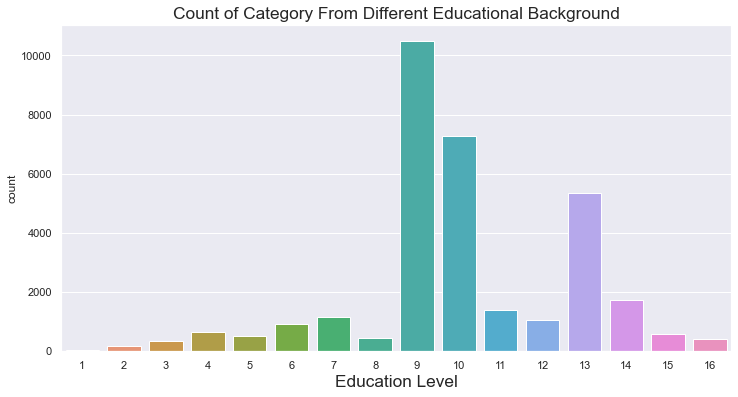

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x='Education_num',data=data)
plt.title('Count of Category From Different Educational Background',fontdict={'fontsize':'x-large'})
plt.xlabel('Education Level',fontdict={'fontsize':'x-large'})
plt.show()

In [32]:
data['Education'].value_counts().sort_values(ascending=False)

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [33]:
data['Education_num'].value_counts().sort_values(ascending=False)

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

- **Observation :** 
    - From graphical representations and above two output it is very evident that **Education** and **Education_num** both provide same information.
    - Different Educational backgrounds are represented with different numbers in a order from lower educational qualification to higher educational qualification or to be precise how many years an individual has spent in education.
    - So we can drop one of the two columns.
    - As any algorithm works only with numerical data, here we will keep **Education_num** Column. Otherwise we will have to apply One Hot Encoding on **Education** Column and that will increase dimention of the dataset. 

In [34]:
data.drop('Education',axis=1,inplace=True)

### Marital Status Column :

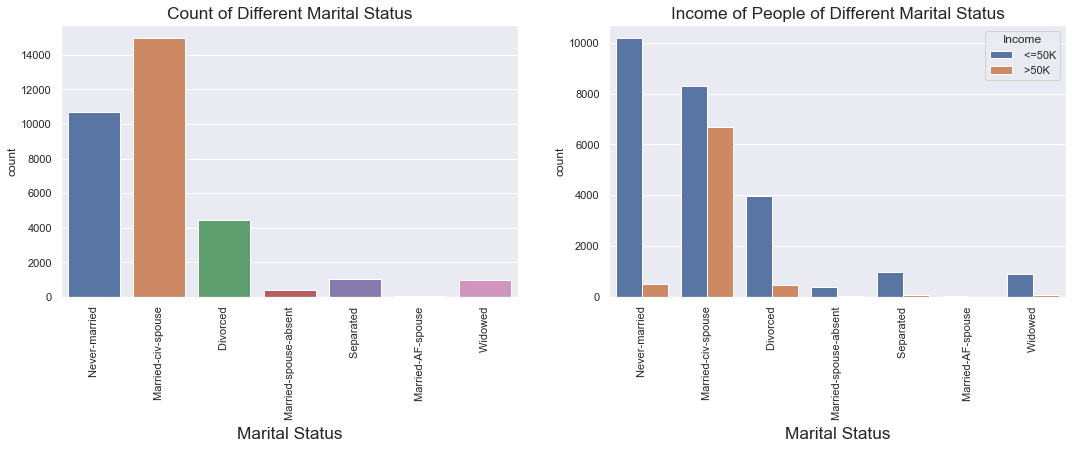

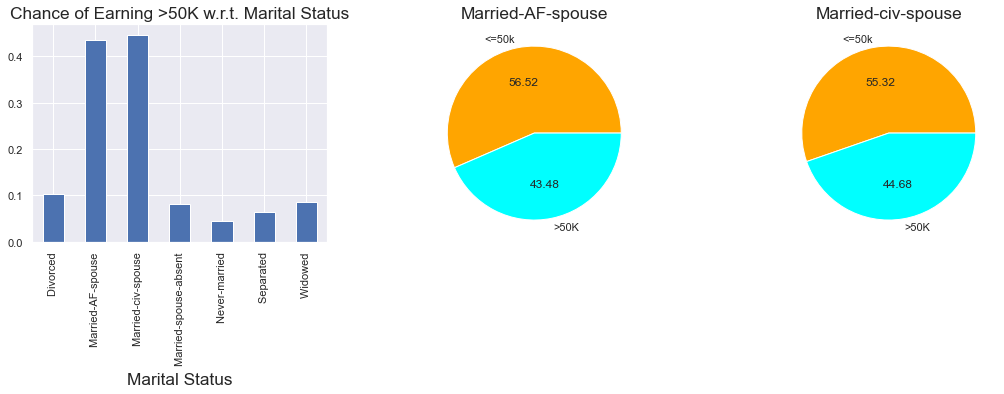

In [35]:
plt.subplots(1,2,figsize=(18,5))

plt.subplot(1,2,1)
sns.countplot(x='Marital_status',data=data)
plt.title('Count of Different Marital Status',fontdict={'fontsize':'x-large'})
plt.xlabel('Marital Status',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Marital_status',data=data,hue='Income')
plt.title('Income of People of Different Marital Status',fontdict={'fontsize':'x-large'})
plt.xlabel('Marital Status',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

###########################################################################################################################

plt.subplots(1,3,figsize=(18,4))

plt.subplot(1,3,1)
(df.groupby('Marital_status')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Chance of Earning >50K w.r.t. Marital Status',fontdict={'fontsize':'x-large'})
plt.xlabel('Marital Status',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,2)
plt.pie(df[df['Marital_status']==' Married-AF-spouse']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Married-AF-spouse',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,3)
plt.pie(df[df['Marital_status']==' Married-civ-spouse']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Married-civ-spouse',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :** 
    - Most of the people belongs to 'Married-civ-spouse' category followed by 'Never Married'. Few are divorsed.
    - Chance of earning >50K is high for 'Married-AF-spouse' category followed by 'Married-civ-spouse'.

### Occupation Column :

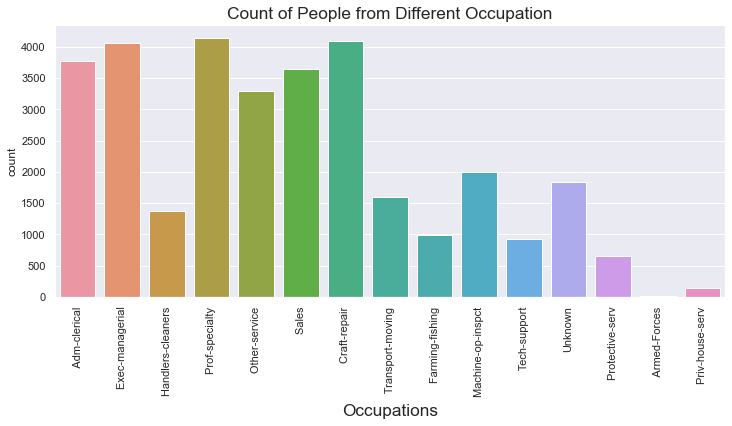

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(x='Occupation',data=data)
plt.title('Count of People from Different Occupation',fontdict={'fontsize':'x-large'})
plt.xlabel('Occupations',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)
plt.show()

- **Observation :**
    - Most of the people belongs to the category 'Prof-Speciality','Craft-Repair','Exec-Managerial' followed by 'Adm-Clerical','Sales','Other-Services'.

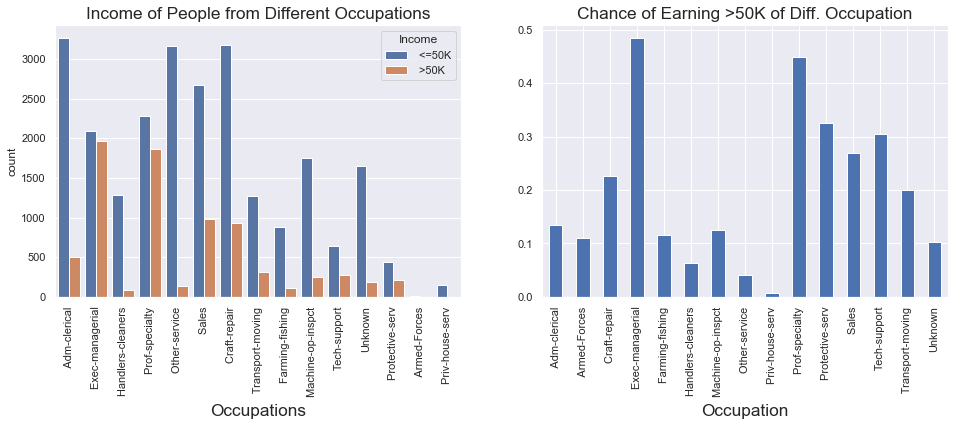

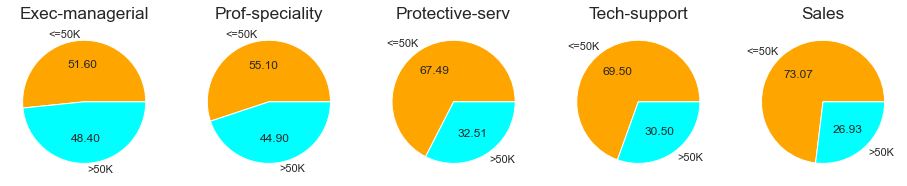

In [37]:
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
sns.countplot(x='Occupation',data=data,hue='Income')
plt.title('Income of People from Different Occupations',fontdict={'fontsize':'x-large'})
plt.xlabel('Occupations',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
(df.groupby('Occupation')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Chance of Earning >50K of Diff. Occupation',fontdict={'fontsize':'x-large'})
plt.xlabel('Occupation',fontdict={'fontsize':'x-large'})

###########################################################################################################################

plt.subplots(1,5,figsize=(16,4))
plt.subplot(1,5,1)
plt.pie(df[df['Occupation']==' Exec-managerial']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Exec-managerial',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(df[df['Occupation']==' Prof-specialty']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Prof-speciality',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(df[df['Occupation']==' Protective-serv']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Protective-serv',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(df[df['Occupation']==' Tech-support']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Tech-support',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(df[df['Occupation']==' Sales']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Sales',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :**
    - People with Exec-managerial and Prof-speciality as occupation have higher chance of earning >50K followed by 'Protective-serv','Tech-support' etc.

### Race Column:

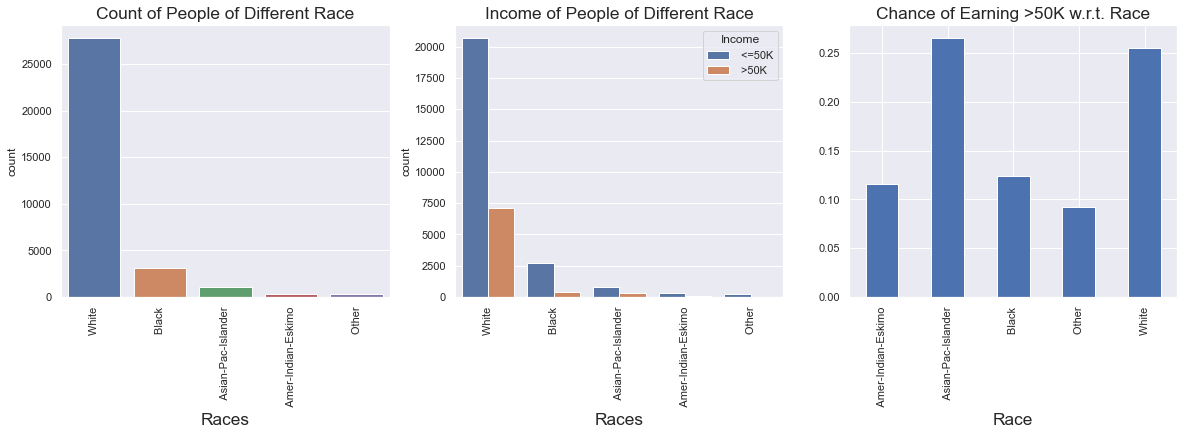

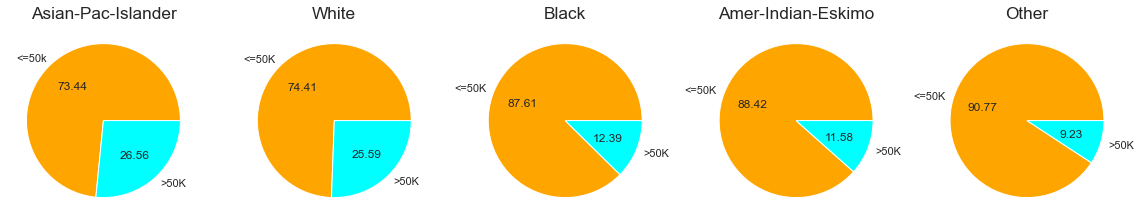

In [38]:
plt.subplots(1,3,figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(x='Race',data=data)
plt.title('Count of People of Different Race',fontdict={'fontsize':'x-large'})
plt.xlabel('Races',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.countplot(x='Race',data=data,hue='Income')
plt.title('Income of People of Different Race',fontdict={'fontsize':'x-large'})
plt.xlabel('Races',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,3,3)
(df.groupby('Race')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Chance of Earning >50K w.r.t. Race',fontdict={'fontsize':'x-large'})
plt.xlabel('Race',fontdict={'fontsize':'x-large'})

###########################################################################################################################

plt.subplots(1,5,figsize=(20,4))
plt.subplot(1,5,1)
plt.pie(df[df['Race']==' Asian-Pac-Islander']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Asian-Pac-Islander',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(df[df['Race']==' White']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('White',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(df[df['Race']==' Black']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Black',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(df[df['Race']==' Amer-Indian-Eskimo']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Amer-Indian-Eskimo',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(df[df['Race']==' Other']['Income'].value_counts(),
        labels=['<=50K','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Other',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :**
    - Maximum no. of people belongs to 'White' race category.
    - People belongs to 'White' or 'Asian-Pac-Islander' category has a higher chance of earning >50K (~27%)

### Gender Column :

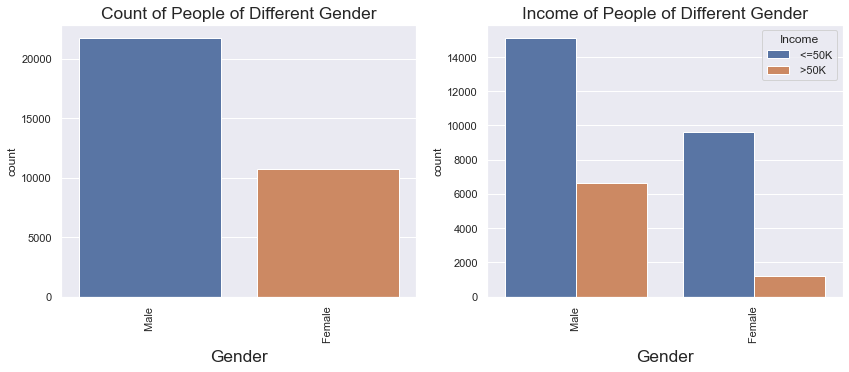

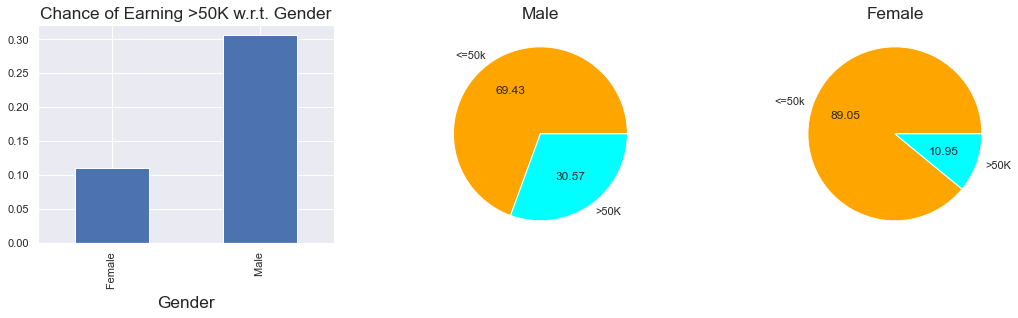

In [39]:
plt.subplots(1,2,figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x='Gender',data=data)
plt.title('Count of People of Different Gender',fontdict={'fontsize':'x-large'})
plt.xlabel('Gender',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Gender',data=data,hue='Income')
plt.title('Income of People of Different Gender',fontdict={'fontsize':'x-large'})
plt.xlabel('Gender',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

###########################################################################################################################

plt.subplots(1,3,figsize=(18,4))

plt.subplot(1,3,1)
(df.groupby('Gender')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Chance of Earning >50K w.r.t. Gender',fontdict={'fontsize':'x-large'})
plt.xlabel('Gender',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,2)
plt.pie(df[df['Gender']==' Male']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Male',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,3)
plt.pie(df[df['Gender']==' Female']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Female',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :**
    - Most of the people are Male in this particular dataset. Number of Males is more than double of number of Females.
    - Males have a higher chance of earning >50K compared to females.

### Relationships Column:

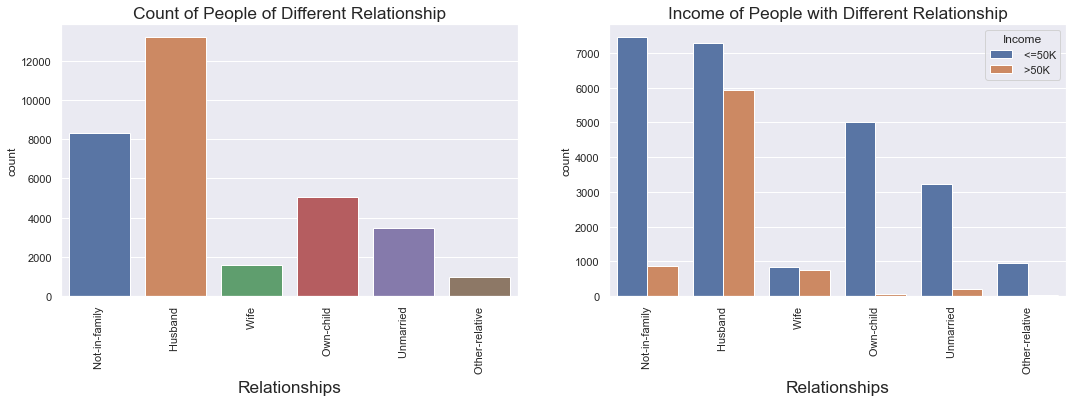

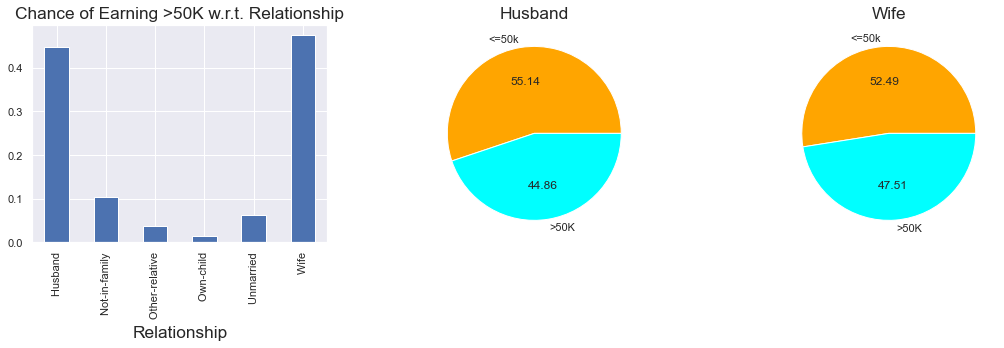

In [40]:
plt.subplots(1,2,figsize=(18,5))

plt.subplot(1,2,1)
sns.countplot(x='Relationship',data=data)
plt.title('Count of People of Different Relationship',fontdict={'fontsize':'x-large'})
plt.xlabel('Relationships',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Relationship',data=data,hue='Income')
plt.title('Income of People with Different Relationship',fontdict={'fontsize':'x-large'})
plt.xlabel('Relationships',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

###########################################################################################################################

plt.subplots(1,3,figsize=(18,4))

plt.subplot(1,3,1)
(df.groupby('Relationship')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Chance of Earning >50K w.r.t. Relationship',fontdict={'fontsize':'x-large'})
plt.xlabel('Relationship',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,2)
plt.pie(df[df['Relationship']==' Husband']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Husband',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,3)
plt.pie(df[df['Relationship']==' Wife']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Wife',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :**
    - No. of Husbands are maximum in the dataset.
    - If the relationship is either Husband or Wife, chances of earning >50K is high compared to others that means for a married couple chance of earning >50K is more.

### Country Column :

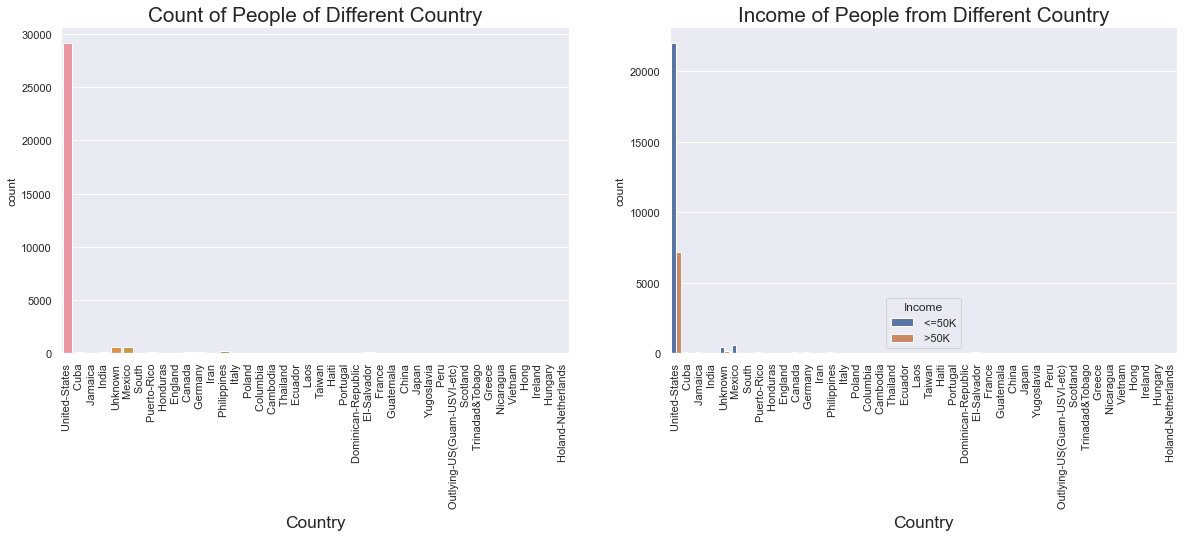

In [41]:
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.countplot(x='Country',data=data)
plt.title('Count of People of Different Country',fontdict={'fontsize':'xx-large'})
plt.xlabel('Country',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Country',data=data,hue='Income')
plt.title('Income of People from Different Country',fontdict={'fontsize':'xx-large'})
plt.xlabel('Country',fontdict={'fontsize':'x-large'})
plt.xticks(rotation=90)

plt.show()

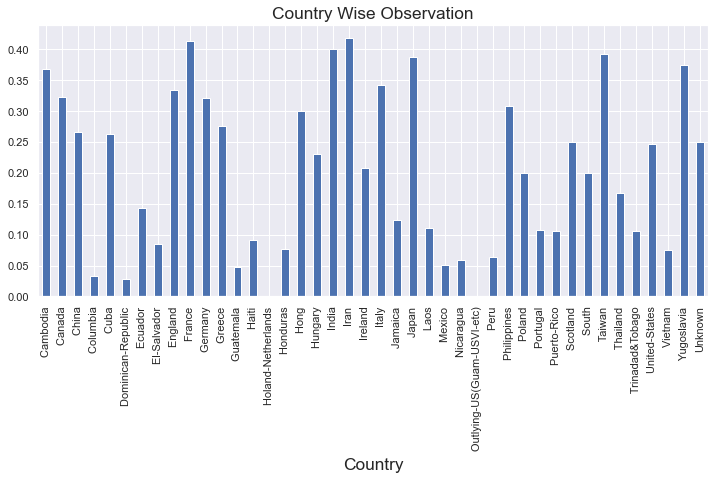

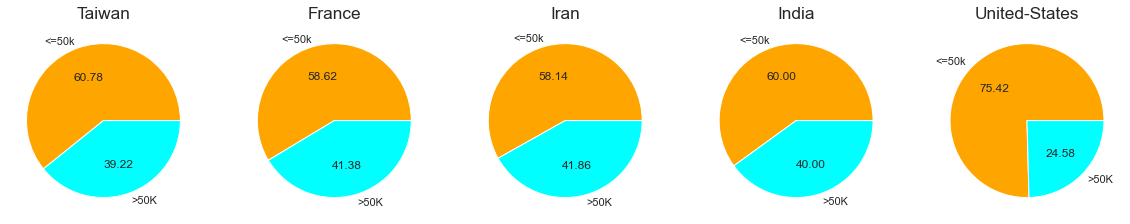

In [42]:
plt.figure(figsize=(12,5))
(df.groupby('Country')['Income'].mean()).plot(kind='bar',style='dark')
plt.title('Country Wise Observation',fontdict={'fontsize':'x-large'})
plt.xlabel('Country',fontdict={'fontsize':'x-large'})

###########################################################################################################################

plt.subplots(1,5,figsize=(20,4))

plt.subplot(1,5,1)
plt.pie(df[df['Country']==' Taiwan']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Taiwan',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,2)
plt.pie(df[df['Country']==' France']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('France',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,3)
plt.pie(df[df['Country']==' Iran']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('Iran',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,4)
plt.pie(df[df['Country']==' India']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('India',fontdict={'fontsize':'x-large'})

plt.subplot(1,5,5)
plt.pie(df[df['Country']==' United-States']['Income'].value_counts(),
        labels=['<=50k','>50K'],
        autopct='%0.2f',colors=['orange','cyan'])
plt.title('United-States',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :**
    - Maximum no. of people included in the dataset are from 'United States' followed by 'Mexico'. But chance of earning >50K is less for people from United States.
    - On the other hand people from Taiwan, France, Iran, India has higher chance to earn >50K, ~45% to ~40%.

### Numerical Columns (Age, Final Census, Hours Per Week, Capital Gain and Capital Loss) :

************************************************************
Distribution of Age column
************************************************************


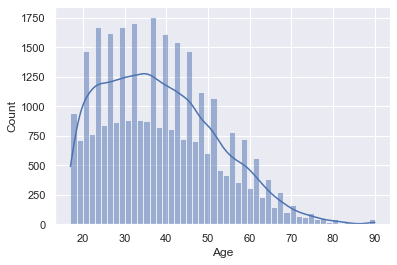

************************************************************
Distribution of Final_census column
************************************************************


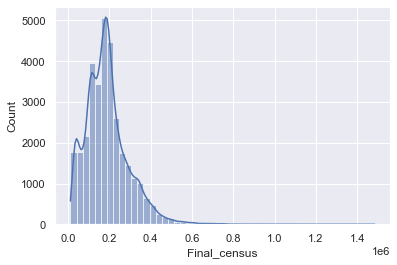

************************************************************
Distribution of Education_num column
************************************************************


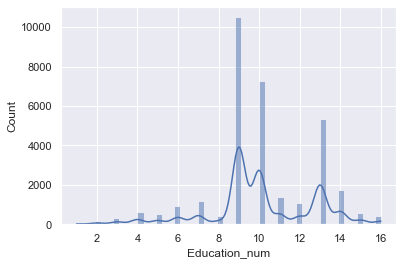

************************************************************
Distribution of Capital_gain column
************************************************************


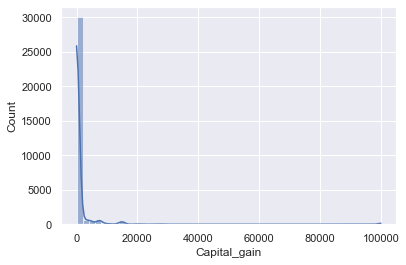

************************************************************
Distribution of Capital_loss column
************************************************************


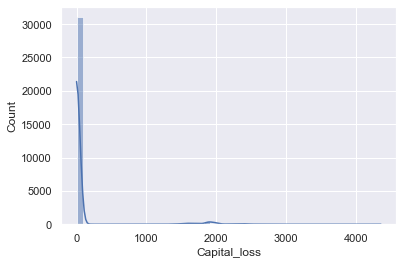

************************************************************
Distribution of Hours_per_week column
************************************************************


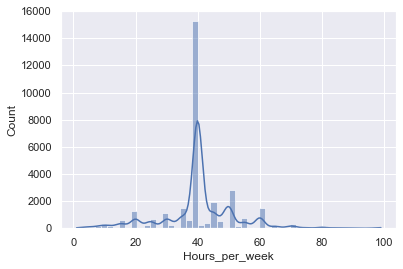

In [43]:
column = data.select_dtypes(include='number').columns
for col in column:
    print('*'*60)
    print(f'Distribution of {col} column')
    print('*'*60)
    sns.histplot(x=col,data=data,kde=True,bins=50)
    plt.show()

- **Observation :**
    - **Age Column :**
        - Data is not normally distributed and it is right skewed.
        - Most of the observations belong to the age range of 20 to 50.
    - **Final Census Column :**
        - Data of this column is also right skewed.
    - **Capital Gain & Capital Loss:**
        - For both the column maximum values are zero and distribution is highly right skewed.
    - **Hours Per Week :**
        - Most of the people works 40 hours a week and that is why there is a spike at 40 in the graph.
        - Values in the column ranges from 1 to 99.

### Graphical Representation of Relationship Between Different Numerical Columns of Dataset :

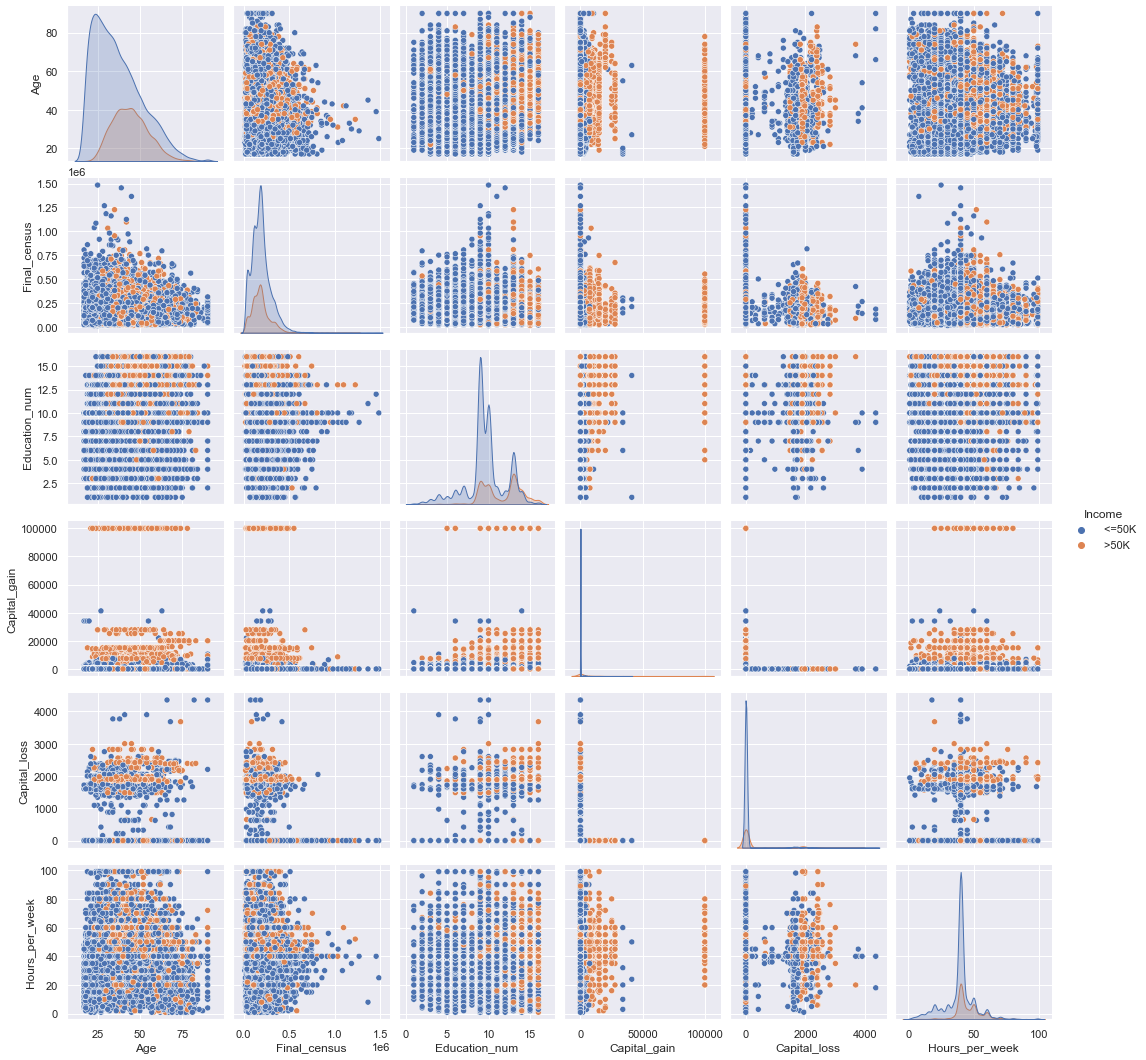

In [44]:
sns.pairplot(data,hue='Income')
plt.show()

- **Observation :**
    - People who earns >50K belongs to theage group >25.
    - Most of the people who earns >50K works more than 40hrs. a week.
    - To earn >50K capital gain has to be greater than 0.
    - People who has capital gain >50000 earns >50K

### Correlation Between Different Numerical Columns of Dataset :

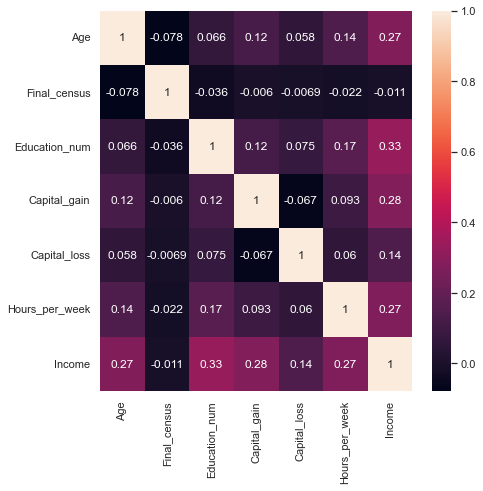

In [45]:
data_10 = data.copy()
data_10['Income'] = data['Income'].map({' >50K':1,' <=50K':0})
plt.figure(figsize=(7,7))
sns.heatmap(data_10.corr(method='spearman'),annot=True)
plt.show()

- **Observation :**
    - There is no multicollinearity present among the numerical independent variables.
    - Target Variable 'Income' has 34% correlation with 'Education_num' column, 24% correlation with 'Age' column, 23% correlation with 'Hours Per Week' column, 22% correlation with 'Capital Gain' column.

# Preprocessing :

## Encoding :

In [46]:
data.head()

,Age,Profession Class,Final_census,Education_num,Marital_status,Occupation,Relationship,Race,Gender,Capital_gain,Capital_loss,Hours_per_week,Country,Income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df_final = data.copy()

### Encoding Columns With Binary Classes :

In [48]:
df_final['Income'] = df_final['Income'].map({' <=50K':0,' >50K':1})
df_final['Gender'] = df_final['Gender'].map({' Male':0,' Female':1})

### One Hot Encoding Of Columns with Multiple Classes :

In [49]:
column = df_final.select_dtypes('O').columns
df_final = pd.get_dummies(df_final, columns=column, drop_first=True)
df_final.head()

,Age,Final_census,Education_num,Gender,Capital_gain,Capital_loss,Hours_per_week,Income,Profession Class_ Local-gov,Profession Class_ Never-worked,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,Profession Class_Unknown,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Occupation_Unknown,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_Unknown
0,39,77516,13,0,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,0,13,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,1,0,0,40,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df_final.shape

(32561, 86)

## Spliting Data Into Independent and dependent Variables :

In [51]:
X = df_final.drop('Income',axis=1)
Y = df_final['Income']

In [52]:
Y.value_counts(normalize=True)*100

0    75.107751
1    24.892249
Name: Income, dtype: float64

## Correlation Between All The Columns Of The Dataset :

As we have observer earlier, the numerical columns of this given dataset is not normally distributed. So, here we will use 'Spearman' method to find correlation coefficients as it is a non-parametric method.

In [53]:
corr_matrix=X.corr(method='spearman')
corr_matrix

,Age,Final_census,Education_num,Gender,Capital_gain,Capital_loss,Hours_per_week,Profession Class_ Local-gov,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
Age,1.000000,-0.078438,0.070416,-0.091740,0.121936,0.061171,0.155916,0.075019,-0.215315,0.110556,0.144572,0.019067,0.010009,-0.015908,0.336701,0.018573,-0.563984,0.021582,0.207928,-0.011219,0.027166,0.121351,0.031002,-0.112127,-0.010912,-0.107539,0.008714,0.069965,0.004590,-0.037321,-0.015085,0.036239,-0.035729,-0.079233,-0.453497,0.063342,0.033790,-0.007020,-0.010592,-0.032776,0.023607,0.013518,0.015689,0.002467,0.028744,-0.003452,-0.007205,-0.016772,0.010073,0.003872,0.006883,0.018956,-0.022448,0.001624,-0.002804,-0.006041,-0.010035,0.013620,0.000594,0.006048,-0.004306,0.029346,-0.010192,0.004618,-0.004599,-0.058418,-0.014279,-0.000060,-0.006247,0.008286,0.009008,0.002169,0.008787,0.001381,0.001967,-0.006930,-0.003877,0.009877,0.015722,-0.019553,0.000892
Final_census,-0.078438,1.000000,-0.035712,-0.023995,-0.007336,-0.007970,-0.025688,0.001709,0.049702,-0.027783,-0.042151,-0.016380,-0.002131,-0.004036,-0.030384,0.005850,0.041253,0.028119,-0.022437,0.006011,0.007935,-0.022393,-0.042096,0.028559,0.020048,-0.006962,0.009021,-0.015904,0.022454,0.006874,-0.001440,0.000537,0.010766,0.029216,0.018075,-0.000639,-0.020855,-0.059467,0.109675,0.010627,-0.047048,-0.005552,-0.006481,0.013419,0.046305,0.008093,0.002851,0.028603,-0.001296,0.001001,0.001434,-0.015716,0.026089,0.013113,-0.009736,0.013543,0.007960,-0.001171,-0.013058,-0.001806,-0.016132,-0.003058,0.020780,-0.003256,0.007565,0.133566,0.026885,0.005503,0.022423,-0.020859,-0.001059,-0.017376,0.013303,-0.003290,-0.012241,0.001889,0.000284,-0.000610,-0.084505,-0.011259,0.004382
Education_num,0.070416,-0.035712,1.000000,-0.000520,0.120848,0.074593,0.168448,0.102022,-0.164005,0.075613,0.007006,0.101072,-0.010812,-0.002762,0.078306,-0.029687,-0.026150,-0.052897,-0.060323,-0.002300,-0.167407,0.212118,-0.096339,-0.142885,-0.176613,-0.179715,-0.064118,0.424573,0.007606,0.027853,0.074969,-0.141787,0.063254,-0.086621,-0.100418,-0.061068,0.032506,0.067812,-0.078375,-0.039068,0.050947,0.012453,0.020205,-0.009674,-0.003618,-0.044163,-0.005584,-0.050011,0.019185,0.023796,0.026420,-0.002463,-0.054061,-0.013720,0.001248,-0.008520,0.008918,0.004605,0.051670,0.033723,-0.003211,-0.015742,-0.006629,0.020243,-0.007629,-0.156592,-0.014870,0.003270,-0.010087,0.032548,0.001280,-0.031841,-0.034357,0.000883,0.017007,0.045701,0.005722,

### Graphical Representation of Correlation Coefficients of different columns :

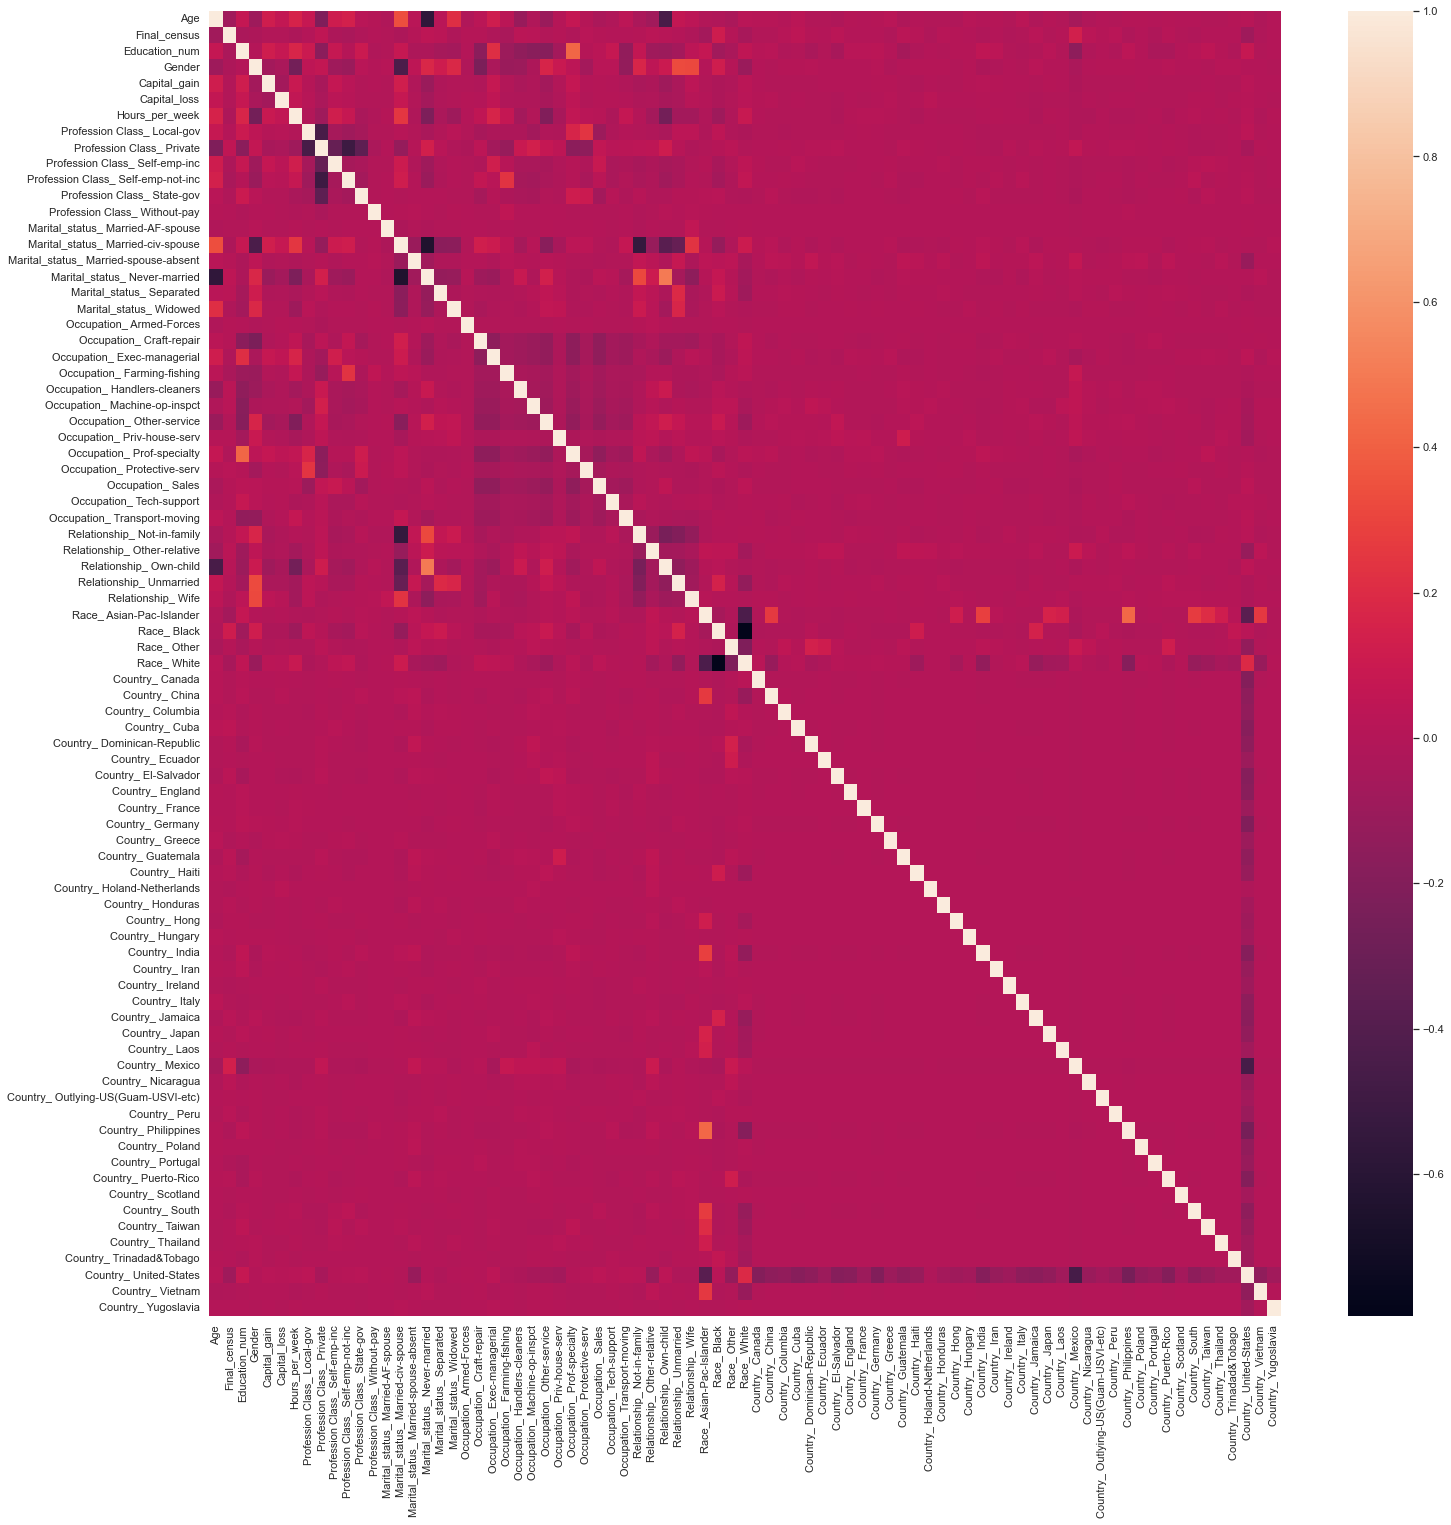

In [54]:
plt.figure(figsize=(24,24))
sns.heatmap(corr_matrix)
plt.show()

### Handling Multicollinearity :

Because of the large dimention of the modified dataset, the heat map is illegible. So we will check manually.

In [55]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_corr = [col for col in upper.columns if any(upper[col] >= 0.9)]
len(high_corr)

0

- **Observation :**
    - No column has correlation coefficient >0.9 which means there is no multicollinearity in the dataset.

## Selecting Top 10 Most Important Features For Income Prediction:

### Method 1 (Using 'SelectKBest') :

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [57]:
impfeature = SelectKBest(score_func=mutual_info_classif)
imp_feature = impfeature.fit(X,Y)
imp_feature

SelectKBest(score_func=<function mutual_info_classif at 0x000001B47815C310>)

In [58]:
df_score = pd.DataFrame(imp_feature.scores_)
df_columns = pd.DataFrame(X.columns)

feature_score = pd.concat([df_columns,df_score],axis=1)
feature_score.columns = ['Feature','Score']

best_features = feature_score.nlargest(10,'Score')
best_features

,Feature,Score
14,Marital_status_ Married-civ-spouse,0.106463
4,Capital_gain,0.082354
2,Education_num,0.065276
0,Age,0.065112
16,Marital_status_ Never-married,0.062155
6,Hours_per_week,0.040619
34,Relationship_ Own-child,0.038679
5,Capital_loss,0.032211
1,Final_census,0.030885
3,Gender,0.026936


### Graphical Representation of Top 10 Most Important Features :

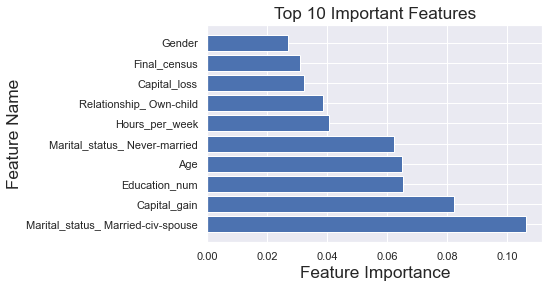

In [59]:
plt.barh(best_features['Feature'],best_features['Score'],color='b')
plt.title('Top 10 Important Features',fontdict={'fontsize':'x-large'})
plt.xlabel('Feature Importance',fontdict={'fontsize':'x-large'})
plt.ylabel('Feature Name',fontdict={'fontsize':'x-large'})
plt.show()

### Method 2 (Using Random Forest Method) :

In [60]:
from sklearn.ensemble import RandomForestClassifier

no_feature = 10
model = RandomForestClassifier()
model.fit(X,Y)
best_feature_index = np.argsort(model.feature_importances_)[::-1][0:no_feature]

best_feature = X.columns[best_feature_index]
best_feature

Index(['Final_census', 'Age', 'Education_num', 'Capital_gain',
       'Marital_status_ Married-civ-spouse', 'Hours_per_week', 'Capital_loss',
       'Marital_status_ Never-married', 'Occupation_ Exec-managerial',
       'Occupation_ Prof-specialty'],
      dtype='object')

In [61]:
feature_importance = model.feature_importances_[best_feature_index]
feature_importance

array([0.17105677, 0.15213366, 0.11170978, 0.10356246, 0.08584902,
       0.08404151, 0.03370612, 0.03328134, 0.02102349, 0.01720717])

In [62]:
Best_Features = pd.DataFrame(columns=['Feature','Importance'])
Best_Features['Feature'] = best_feature
Best_Features['Importance'] = feature_importance
Best_Features

,Feature,Importance
0,Final_census,0.171057
1,Age,0.152134
2,Education_num,0.111710
3,Capital_gain,0.103562
4,Marital_status_ Married-civ-spouse,0.085849
5,Hours_per_week,0.084042
6,Capital_loss,0.033706
7,Marital_status_ Never-married,0.033281
8,Occupation_ Exec-managerial,0.021023
9,Occupation_ Prof-specialty,0.017207


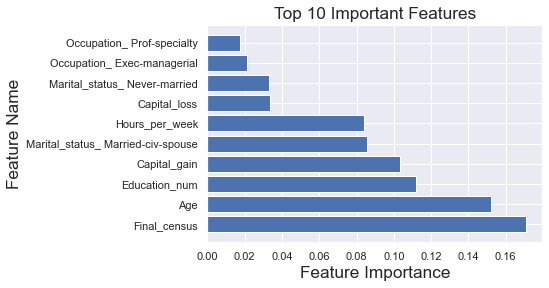

In [63]:
plt.barh(best_feature,feature_importance)
plt.title('Top 10 Important Features',fontdict={'fontsize':'x-large'})
plt.xlabel('Feature Importance',fontdict={'fontsize':'x-large'})
plt.ylabel('Feature Name',fontdict={'fontsize':'x-large'})
plt.show()

- **Observatin :**
    - We have calculated Feature Importance using two different methods.
    - Some of the common important feature that is present in output of both the methods are:
        - 1. Age
        - 2. Final_Census
        - 3. Capital Gain
        - 4. Capital Loss
        - 5. Hours Per Week
        - 6. Marital Status Married civ spouse
        - 7. Education Num
        - 8. Marital Status Never Married

## Scaling :

- Values of Capital_Gain and Capital_Loss columns vary from 0 to 99999 and 0 to 4356 respectively. Similarly values of Hours Per Week ranges from 1 to 99. Values of other numerical columns are spread over a wide range as well. So to avoid biasness towards higher values we need to scale the dataset.

- Here the numerical columns are not normally distributed. So we will apply MinMaxScaler as it is non-parametric approach.

In [64]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_Scaled = scale.fit_transform(X)
X_Scaled = pd.DataFrame(X_Scaled,columns=X.columns)
X_Scaled.head()

,Age,Final_census,Education_num,Gender,Capital_gain,Capital_loss,Hours_per_week,Profession Class_ Local-gov,Profession Class_ Private,Profession Class_ Self-emp-inc,Profession Class_ Self-emp-not-inc,Profession Class_ State-gov,Profession Class_ Without-pay,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Country_ Canada,Country_ China,Country_ Columbia,Country_ Cuba,Country_ Dominican-Republic,Country_ Ecuador,Country_ El-Salvador,Country_ England,Country_ France,Country_ Germany,Country_ Greece,Country_ Guatemala,Country_ Haiti,Country_ Holand-Netherlands,Country_ Honduras,Country_ Hong,Country_ Hungary,Country_ India,Country_ Iran,Country_ Ireland,Country_ Italy,Country_ Jamaica,Country_ Japan,Country_ Laos,Country_ Mexico,Country_ Nicaragua,Country_ Outlying-US(Guam-USVI-etc),Country_ Peru,Country_ Philippines,Country_ Poland,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.301370,0.043338,0.800000,0.0,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.047277,0.800000,0.0,0.00000,0.0,0.122449,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.137244,0.533333,0.0,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.150212,0.400000,0.0,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.220703,0.800000,1.0,0.00000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building :

## Import Algorithms and Performance Parameters :

In [65]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict,StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,precision_recall_fscore_support
from sklearn.metrics import roc_curve,auc

In [66]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
Support = SVC()
GNB = GaussianNB()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
Bag = BaggingClassifier()
ADA = AdaBoostClassifier()
GB = GradientBoostingClassifier()
XGB = XGBClassifier()

## Probable Model Selection :

### Using Stratified Shuffle Split and Cross Validation Approach :

In [67]:
models = [LR, KNN, Support, GNB, DT, RF, Bag, ADA, GB, XGB]

model_name = ['Logistioc Regression','KNN','SVM','Gaussian Naive Bayes','Decision Tree','Random Forest Classifier',
              'Bagging Classifier','AdaBoost Classifier','Gradient Boosting','XGBoost Classifier']
model_accuracy = []
model_roc_auc = []
model_precision = []
model_recall = []
model_f1 = []

for model in models:
    print('*'*65)
    print(f'Performance of {model}')
    print('*'*65)
    CV = StratifiedShuffleSplit(n_splits=10,test_size=0.20,random_state=100)
    Scoring = ['accuracy','roc_auc','f1_macro','precision_macro','recall_macro']
    cross_val_scores = cross_validate(model,X_Scaled,Y,scoring=Scoring,cv=CV)
    
    # Calculation of Performance Metrics
    accuracy_test_cv = round(cross_val_scores['test_accuracy'].mean(),4)
    roc_auc_test_cv = round(cross_val_scores['test_roc_auc'].mean(),4)
    f1_test_cv = round(cross_val_scores['test_f1_macro'].mean(),4)
    precision_test_cv = round(cross_val_scores['test_precision_macro'].mean(),4)
    recall_test_cv = round(cross_val_scores['test_recall_macro'].mean(),4)
    
    # Appending To Performance List
    model_accuracy.append(accuracy_test_cv)
    model_roc_auc.append(roc_auc_test_cv)
    model_f1.append(f1_test_cv)
    model_precision.append(precision_test_cv)
    model_recall.append(recall_test_cv)
    
    # Print Performance Metrics
    print(f'Accuracy : {accuracy_test_cv}')
    print(f'ROC_AUC : {roc_auc_test_cv}')
    print(f'F1 MACRO : {f1_test_cv}')
    print(f'PRECISION MACRO : {precision_test_cv}')
    print(f'RECALL MACRO : {recall_test_cv}')

*****************************************************************
Performance of LogisticRegression()
*****************************************************************
Accuracy : 0.8448
ROC_AUC : 0.9015
F1 MACRO : 0.7779
PRECISION MACRO : 0.8025
RECALL MACRO : 0.7613
*****************************************************************
Performance of KNeighborsClassifier()
*****************************************************************
Accuracy : 0.8212
ROC_AUC : 0.8423
F1 MACRO : 0.7493
PRECISION MACRO : 0.7637
RECALL MACRO : 0.7386
*****************************************************************
Performance of SVC()
*****************************************************************
Accuracy : 0.834
ROC_AUC : 0.89
F1 MACRO : 0.7576
PRECISION MACRO : 0.7899
RECALL MACRO : 0.7383
*****************************************************************
Performance of GaussianNB()
*****************************************************************
Accuracy : 0.532
ROC_AUC : 0.7907
F1 MACRO : 0.5304


### Tabular Representation of Performance of Different Model :

In [68]:
Model_Performance = pd.DataFrame(zip(model_name,model_accuracy,model_roc_auc,model_f1,model_precision,model_recall),
                                 columns=['Model Name','Accuracy','ROC_AUC Score','F1 Score','Precision','Recall'])
Model_Performance

,Model Name,Accuracy,ROC_AUC Score,F1 Score,Precision,Recall
0,Logistioc Regression,0.8448,0.9015,0.7779,0.8025,0.7613
1,KNN,0.8212,0.8423,0.7493,0.7637,0.7386
2,SVM,0.8340,0.8900,0.7576,0.7899,0.7383
3,Gaussian Naive Bayes,0.5320,0.7907,0.5304,0.6540,0.6741
4,Decision Tree,0.8111,0.7495,0.7485,0.7475,0.7495
5,Random Forest Classifier,0.8509,0.9038,0.7890,0.8097,0.7741
6,Bagging Classifier,0.8446,0.8797,0.7765,0.8034,0.7587
7,AdaBoost Classifier,0.8548,0.9121,0.7907,0.8202,0.7714
8,Gradient Boosting,0.8601,0.9183,0.7961,0.8317,0.7740
9,XGBoost Classifier,0.8655,0.9237,0.8099,0.8314,0.7940


- **Observation :**
    - **Random Forest Classifier** , **AdaBoost Classifier** , **Gradient Boosting Classifier** and **XGBoost Classifier** are performing well.
    - Accuracy of these models are within 85% to 86% ,ROC_AUC Score ranges from 90% to 92% and F1 Score is in between 79% to 80%.

### Performance of The Selected Models Using Train Test Split  Approach :

In [69]:
X_train,X_test,Y_train,Y_test = train_test_split(X_Scaled,Y,test_size=0.20,random_state=999,stratify=Y)

In [70]:
models = [KNN,Support,RF,ADA,GB,XGB]

model_name = ['KNN','SVM','Random Forest Classifier','AdaBoost Classifier','Gradient Boosting','XGBoost Classifier']
model_accuracy = []
model_roc_auc = []
model_precision = []
model_recall = []
model_f1 = []

for model in models:
    print('*'*65)
    print(f'Performance of {model}')
    print('*'*65)
    # Train The Model
    fit_model = model.fit(X_train,Y_train)
    
    # Calculating Performance of Model
    Y_Pred = fit_model.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_Pred)
    roc_auc_value = roc_auc_score(Y_test,Y_Pred)
    precision,recall,f1_score,support = precision_recall_fscore_support(Y_test,Y_Pred, average="macro")
    
    # Appending To Performance List
    model_accuracy.append(accuracy)
    model_roc_auc.append(roc_auc_value)
    model_f1.append(f1_score)
    model_precision.append(precision)
    model_recall.append(recall)
    
    # Printing The Performance Parameters
    print(f'Accuracy Score : {accuracy_score(Y_test,Y_Pred)}')
    print(f'ROC_AUC Score : {roc_auc_score(Y_test,Y_Pred)}')
    print(f'Confusion Matrix :\n{confusion_matrix(Y_test,Y_Pred)}')
    print(f'Classification Report :\n{classification_report(Y_test,Y_Pred)}')
    print(f'MACRO Precision_Recall_F1 Score :\n{precision_recall_fscore_support(Y_test,Y_Pred, average="macro")}')
#     print(f'Important Features :\n{Best_Features}')

*****************************************************************
Performance of KNeighborsClassifier()
*****************************************************************
Accuracy Score : 0.8198242996850654
ROC_AUC Score : 0.7336181787778877
Confusion Matrix :
[[4102  429]
 [ 658  844]]
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4531
           1       0.66      0.56      0.61      1502

    accuracy                           0.82      6033
   macro avg       0.76      0.73      0.75      6033
weighted avg       0.81      0.82      0.81      6033

MACRO Precision_Recall_F1 Score :
(0.7623827457141537, 0.7336181787778878, 0.7456466734736028, None)
*****************************************************************
Performance of SVC()
*****************************************************************
Accuracy Score : 0.8407094314603016
ROC_AUC Score : 0.7468547784885363
Confusion Matrix :
[[4231  300]
 [ 66

### Tabular Representation of Performance of Different Models :

In [71]:
Model_Performance = pd.DataFrame(zip(model_name,model_accuracy,model_roc_auc,model_f1,model_precision,model_recall),
                                 columns = ['Model Name','Accuracy','ROC_AUC Score','F1 Score','Precision','Recall'])
Model_Performance

,Model Name,Accuracy,ROC_AUC Score,F1 Score,Precision,Recall
0,KNN,0.819824,0.733618,0.745647,0.762383,0.733618
1,SVM,0.840709,0.746855,0.767207,0.800977,0.746855
2,Random Forest Classifier,0.855959,0.777926,0.794780,0.818819,0.777926
3,AdaBoost Classifier,0.858611,0.777466,0.796661,0.825390,0.777466
4,Gradient Boosting,0.862258,0.773885,0.797815,0.837579,0.773885
5,XGBoost Classifier,0.870380,0.798208,0.815753,0.840253,0.798208


- **Observation :**
    - Performance of XGBoost Classifier is best w.r.t the above table.
    - ADABoost and Gradient Boost provides similar accuracy ~86% but ROC_AUC Score, and recall value of AdaBoost is better than Gradient Boosting Classification.

## ROC_AUC Curve :

In [72]:
# XGB Classifier
fit_model = XGB.fit(X_train,Y_train)
Y_Pred_Train_XGB = fit_model.predict(X_train)
Y_Pred_Test_XGB = fit_model.predict(X_test)

fpr_XGB, tpr_XGB, threshold = roc_curve(Y_test, Y_Pred_Test_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)

# ADA Boost Classifier 
fit_model = ADA.fit(X_train,Y_train)
Y_Pred_Train_ADA = fit_model.predict(X_train)
Y_Pred_Test_ADA = fit_model.predict(X_test)

fpr_ADA, tpr_ADA, threshold = roc_curve(Y_test, Y_Pred_Test_ADA)
roc_auc_ADA = auc(fpr_XGB, tpr_ADA)

# GB Classifier
fit_model = GB.fit(X_train,Y_train)
Y_Pred_Train_GB = fit_model.predict(X_train)
Y_Pred_Test_GB = fit_model.predict(X_test)

fpr_GB, tpr_GB, threshold = roc_curve(Y_test, Y_Pred_Test_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)

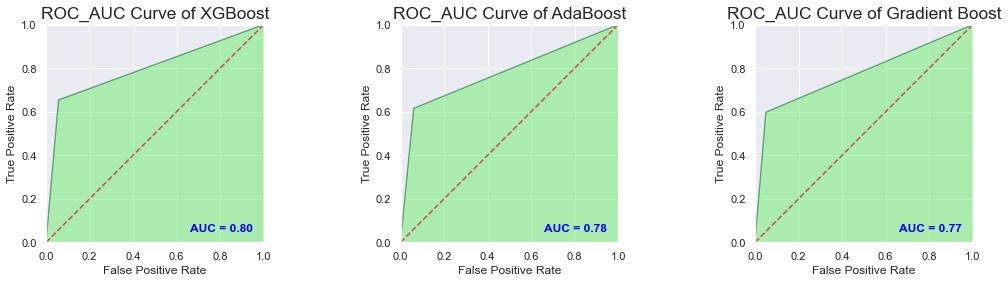

In [73]:
plt.subplots(1,3,figsize=(18,4))

plt.subplot(1,3,1)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_XGB, tpr_XGB, 'g')
plt.fill_between(fpr_XGB, tpr_XGB, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc_XGB, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC_AUC Curve of XGBoost',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,2)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_ADA, tpr_ADA, 'g')
plt.fill_between(fpr_ADA, tpr_ADA, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc_ADA, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC_AUC Curve of AdaBoost',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,3)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_GB, tpr_GB, 'g')
plt.fill_between(fpr_GB, tpr_GB, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc_GB, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC_AUC Curve of Gradient Boost',fontdict={'fontsize':'x-large'})

plt.show()

## Performance Matrix :

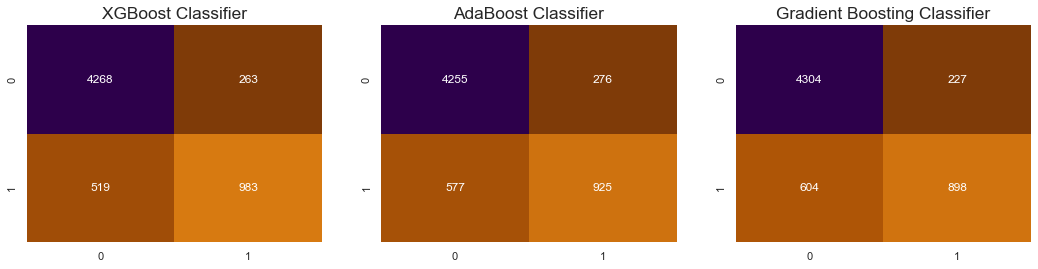

In [74]:
plt.subplots(1,3,figsize=(18,4))

plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(Y_test,Y_Pred_Test_XGB),annot=True,cbar=False,fmt='g',cmap='PuOr')
plt.title('XGBoost Classifier',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(Y_test,Y_Pred_Test_ADA),annot=True,cbar=False,fmt='g',cmap='PuOr')
plt.title('AdaBoost Classifier',fontdict={'fontsize':'x-large'})

plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(Y_test,Y_Pred_Test_GB),annot=True,cbar=False,fmt='g',cmap='PuOr')
plt.title('Gradient Boosting Classifier',fontdict={'fontsize':'x-large'})

plt.show()

- **Observation :**
    - From all the confusion matrix we can observe one point that **False Negative** value high for all the cases.
    - We have observed the same in classification report of the models as well. Recall value of minority class of best performed model amongst this three i.e XGBoost Classifier is 0.65 only.
    - So, we will balance the dataset and observe the performances.

## Balancing The Dataset :

In [75]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,BorderlineSMOTE,ADASYN,SVMSMOTE

In [76]:
over = RandomOverSampler()
smote = SMOTE()
border_smote = BorderlineSMOTE()
adasyn = ADASYN()
svm_smote = SVMSMOTE()

In [77]:
over_sampler = [over, smote, border_smote, adasyn, svm_smote]
models = [XGB,GB,ADA]
for sampler in over_sampler:
    print('='*80)
    print(' '*30,sampler,' '*30)
    print('='*80)
    X_train_balanced,Y_train_balanced = sampler.fit_resample(X_train,Y_train)
    for model in models:
        print('*'*65)
        print(f'Performance of {model}')
        print('*'*65)
        fit_model = model.fit(X_train_balanced,Y_train_balanced)
        Y_pred = fit_model.predict(X_test)
        print(f'Accuracy Score : {accuracy_score(Y_test,Y_pred)}')
        print(f'ROC_AUC Score : {roc_auc_score(Y_test,Y_pred)}')
        print(f'Confusion Matrix :\n{confusion_matrix(Y_test,Y_pred)}')
        print(f'Classification Report :\n{classification_report(Y_test,Y_pred)}')
        print(f'MACRO Precision_Recall_F1 Score :\n{precision_recall_fscore_support(Y_test,Y_pred, average="macro")}')

                               RandomOverSampler()                               
*****************************************************************
Performance of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
*****************************************************************
Accuracy Score : 0.

Accuracy Score : 0.8198242996850654
ROC_AUC Score : 0.8339830714935814
Confusion Matrix :
[[3651  880]
 [ 207 1295]]
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      4531
           1       0.60      0.86      0.70      1502

    accuracy                           0.82      6033
   macro avg       0.77      0.83      0.79      6033
weighted avg       0.86      0.82      0.83      6033

MACRO Precision_Recall_F1 Score :
(0.7708737777301085, 0.8339830714935813, 0.7874020633816905, None)
*****************************************************************
Performance of AdaBoostClassifier()
*****************************************************************
Accuracy Score : 0.8095474888115366
ROC_AUC Score : 0.8182397721158077
Confusion Matrix :
[[3629  902]
 [ 247 1255]]
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      4531
           1 

- **Observation :**
    - For all of the oversampling methods accuracy of the model is decreased by 1% or 2%.
    - Although, accuracy has dropped by only 0.74% in case of XGBoost model with SMOTE technique, recall value of minority class has increased from 0.65 to 0.73.
    - So we will use XGBoost Classifier model with SMOTE over sampling technique

ACCURACY SCORE : 0.8614288082214487
ROC_AUC SCORE : 0.82051151690338
PRECISION : 0.8133830893375434
RECALL : 0.8205115169033799
F1 SCORE : 0.8168269985066041

CONFUSION MATRIX :
[[4087  444]
 [ 392 1110]]

CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      4531
           1       0.71      0.74      0.73      1502

    accuracy                           0.86      6033
   macro avg       0.81      0.82      0.82      6033
weighted avg       0.86      0.86      0.86      6033




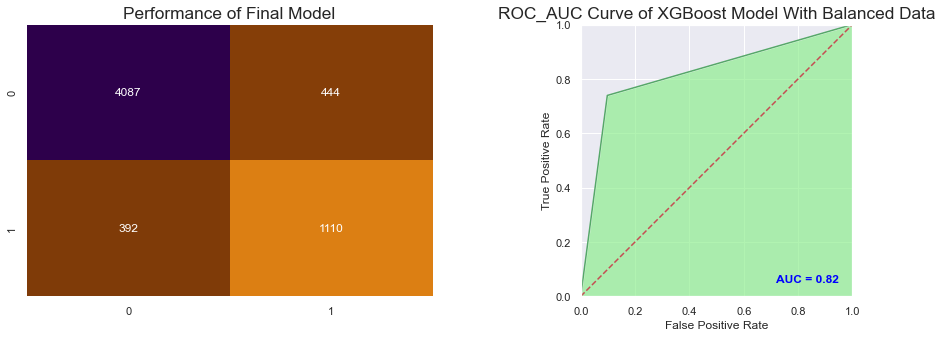

In [78]:
smote = SMOTE()
X_train_balanced,Y_train_balanced = smote.fit_resample(X_train,Y_train)
XGB_Balanced = XGB.fit(X_train_balanced,Y_train_balanced)
Y_Pred_Balanced = XGB_Balanced.predict(X_test)

Precision, Recall, F1_Score, Support = precision_recall_fscore_support(Y_test,Y_Pred_Balanced, average='macro') 

fpr_balanced, tpr_balanced, threshold = roc_curve(Y_test, Y_Pred_Balanced)
roc_auc_balanced = auc(fpr_balanced, tpr_balanced)

print(f'ACCURACY SCORE : {accuracy_score(Y_test,Y_Pred_Balanced)}')
print(f'ROC_AUC SCORE : {roc_auc_score(Y_test,Y_Pred_Balanced)}')
print(f'PRECISION : {Precision}')
print(f'RECALL : {Recall}')
print(f'F1 SCORE : {F1_Score}')
print()
print(f'CONFUSION MATRIX :\n{confusion_matrix(Y_test,Y_Pred_Balanced)}')
print()
print(f'CLASSIFICATION REPORT :\n{classification_report(Y_test,Y_Pred_Balanced)}')
print()

plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_test,Y_Pred_Balanced), annot=True, cbar=False, fmt='g',cmap='PuOr')
plt.title('Performance of Final Model',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_balanced, tpr_balanced, 'g')
plt.fill_between(fpr_balanced, tpr_balanced, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc_balanced, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC_AUC Curve of XGBoost Model With Balanced Data',fontdict={'fontsize':'x-large'})

plt.show()

## Checking For Over Fitting :

### Using Cross Validation Approach :

In [79]:
print('*'*60)
print(f'Performance of XGBoost With Balanced Dataset')
print('*'*60)
for i in range(2,11):
        cv = cross_val_score(XGB_Balanced, X_Scaled, Y, cv=i)
        print(f'Accuracy with K value {i} is : {cv.mean()}')

************************************************************
Performance of XGBoost With Balanced Dataset
************************************************************
Accuracy with K value 2 is : 0.8629069690338838
Accuracy with K value 3 is : 0.8664213248458325
Accuracy with K value 4 is : 0.8679797610375395
Accuracy with K value 5 is : 0.8669520005135329
Accuracy with K value 6 is : 0.8669849479477487
Accuracy with K value 7 is : 0.8678801923353555
Accuracy with K value 8 is : 0.8667860951263553
Accuracy with K value 9 is : 0.8675489476181962
Accuracy with K value 10 is : 0.8673166490681892


### Using Train Test Split Approach :

In [80]:
print('*'*60)
print('Performance of XGBoost Classifier With Balanced Dataset :')
print('*'*60)
Y_Pred_Train_XGB = XGB_Balanced.predict(X_train)
Y_Pred_Test_XGB = XGB_Balanced.predict(X_test)
print(f'Traning Accuracy Score : {accuracy_score(Y_train,Y_Pred_Train_XGB)}')
print(f'Testing Accuracy Score : {accuracy_score(Y_test,Y_Pred_Test_XGB)}')

************************************************************
Performance of XGBoost Classifier With Balanced Dataset :
************************************************************
Traning Accuracy Score : 0.8915412988520038
Testing Accuracy Score : 0.8614288082214487


- **Observation :**
    - The XGBoost Classifier model do not have Over Fitting Problem, verified by both Cross Validation and Train Test Split Method.
    - In case of Cross Validation Accuracy is consistant for all iteration with different 'k' value.
    - In Train Test Split method difference between training accuracy and testing accuracy is less than 10%.
    - The XGBoost Classifier Model trained with balanced data derived by SMOTE technique is selected.
    - The performance of the model is as follows :
        - **ACCURACY SCORE :** 86%
        - **ROC_AUC SCORE :** 82%
        - **PRECISION :** 81%
        - **RECALL :** 82%
        - **RECALL VALUE Of MINORITY CLASS :** 0.74
        - **F1 SCORE :** 82%

## Optimization :

### Hyper Parameter Tuning :

In [81]:
XGB_Balanced.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [82]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [83]:
max_depth = [3,4]
max_leaves = [1,2]
reg_alpha = [0,1]
XGB_modified = XGBClassifier(random_state=100)
params = {'max_depth':max_depth,'max_leaves':max_leaves,'reg_alpha':reg_alpha}
random_cv = RandomizedSearchCV(XGB_modified,params,n_jobs=-1,cv=10)

In [84]:
%%time
random_cv.fit(X_train_balanced,Y_train_balanced)
print('Best Parameters :')
print(random_cv.best_params_)

Best Parameters :
{'reg_alpha': 1, 'max_leaves': 1, 'max_depth': 4}
CPU times: total: 22.6 s
Wall time: 5min 49s


In [85]:
random_cv.best_score_

0.889619593514501

- **Observation :**
    - With the help of Randomised Search Cross Validation method we are able to find the best parameters for the model and it increases the performance of the model by 2%.

## Final Model Selection:

- XGBoost Classifier with the obtained best parameters is selected as final model for Income Prediction.
- Performance of Model is as follows :
    - **1. Accuracy :** 86%
    - **2. ROC_AUC Score :** 82%
    - **3. Precision :** 81%
    - **4. Recall :** 82%
    - **5. F1 Score :** 82%

In [87]:
selected_model = XGBClassifier(random_state=100, max_depth=4, max_leaves=1, reg_alpha=1,n_jobs=-1)

no_of_feature = 10
selected_model.fit(X,Y)
best_feature_index = np.argsort(selected_model.feature_importances_)[::-1][0:no_of_feature]

best_feature = X.columns[best_feature_index]

feature_importance = selected_model.feature_importances_[best_feature_index]

Best_Features = pd.DataFrame(columns=['Feature','Importance'])
Best_Features['Feature'] = best_feature
Best_Features['Importance'] = feature_importance

ACCURACY SCORE : 0.8582794629537543
ROC_AUC SCORE : 0.8246459293148751
PRECISION : 0.8079679782150163
RECALL : 0.8246459293148751
F1 SCORE : 0.8156166014637459

CONFUSION MATRIX :
[[4040  491]
 [ 364 1138]]

CLASSIFICATION REPORT :
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4531
           1       0.70      0.76      0.73      1502

    accuracy                           0.86      6033
   macro avg       0.81      0.82      0.82      6033
weighted avg       0.86      0.86      0.86      6033





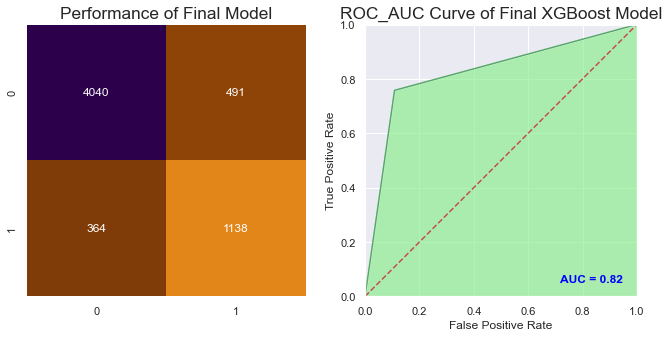

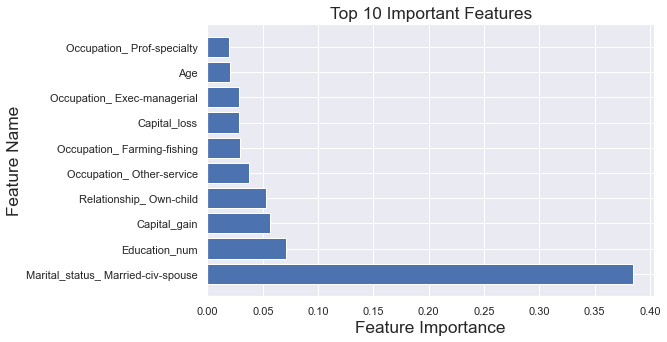

In [88]:
XGB = XGBClassifier(random_state=100, max_depth=4, max_leaves=1, reg_alpha=1,n_jobs=-1)
final_model = XGB.fit(X_train_balanced,Y_train_balanced)
Y_Predict = final_model.predict(X_test)

Precision, Recall, F1_Score, Support = precision_recall_fscore_support(Y_test,Y_Predict, average='macro') 

fpr_final, tpr_final, threshold = roc_curve(Y_test, Y_Predict)
roc_auc_final = auc(fpr_final, tpr_final)

print(f'ACCURACY SCORE : {accuracy_score(Y_test,Y_Predict)}')
print(f'ROC_AUC SCORE : {roc_auc_score(Y_test,Y_Predict)}')
print(f'PRECISION : {Precision}')
print(f'RECALL : {Recall}')
print(f'F1 SCORE : {F1_Score}')
print()
print(f'CONFUSION MATRIX :\n{confusion_matrix(Y_test,Y_Predict)}')
print()
print(f'CLASSIFICATION REPORT :\n{classification_report(Y_test,Y_Predict)}')
print()

plt.subplots(1,2,figsize=(11,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(Y_test,Y_Predict), annot=True, cbar=False, fmt='g',cmap='PuOr')
plt.title('Performance of Final Model',fontdict={'fontsize':'x-large'})

plt.subplot(1,2,2)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_final, tpr_final, 'g')
plt.fill_between(fpr_final, tpr_final, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.2f' % roc_auc_final, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC_AUC Curve of Final XGBoost Model',fontdict={'fontsize':'x-large'})
print()
plt.subplots(1,1,figsize=(8,5))
plt.subplot(1,1,1)
plt.barh(best_feature,feature_importance)
plt.title('Top 10 Important Features',fontdict={'fontsize':'x-large'})
plt.xlabel('Feature Importance',fontdict={'fontsize':'x-large'})
plt.ylabel('Feature Name',fontdict={'fontsize':'x-large'})

plt.show()

# Conclusion :

        We have successfully train our model to predict income of a person with an accuracy ~87%. We proceeded step by step analysing, cleaning and modelling the data. We have applied various machine learning algorithm to achieve the desired result. We have also tuned the model to to improve accuracy and finally we are able to build a moder with a quiet good accuracy, precision and recall. 